# Modelflow methods reference 

The main text of this document presents a large range of `modelflow` features in the context of where they may be used.  This chapter reproduces much of that information but out of context.  It is not a full technical reference to `modelflow` that can be found [here,]() but it does attempt to put into place a handy reference to many of the commands that a `modelflow` user of the World Bank models would need.




## Preparing the python workspace for use with `modelflow`

To use `modelflow` with the World Bank models one has to import into your python sessions the `modelflow` and python package elements that will be used.

In [9]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')

Assuming the ModelFlow library has been installed on your machine, the following imports set up your notebook so that you can run the cells in this notebook.



In [10]:
%matplotlib inline

In [11]:
from modelclass import model 

In order to manipulate plots later on matplotlib.pyplot is also imported. 

In [12]:
import matplotlib.pyplot as plt # To manipulate plots 

In [13]:
# housekeeping for developement 
%load_ext autoreload   
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Useful Jupyter Notebook commands and features

### .widescreen() 

Instructs modelflow to take full advantage of the space available on the browser under which `Jupyter Notebook` is running.

In [14]:
model.widescreen() 

### .scroll_off() 

Disables the scrolling feaures of  Jupyter Notebook cells.

Ib when would you ever use this?



:::{index} single: Ib ; yes, i find it convinient but we can delete all of it 
:::

In [15]:
model.scroll_off()

## Simulation 

Forthcomming 

## Modifying models 

Forthcomming

## Dumping and loading of model, data, description
A model instance can - among other objects - contain: 
- Model equations
  - `.equations` 
- Model name
  - `.modelname`
- Model description:
   - `.model_description` 
- Data
    - `.basedf` 
    - `.lastdf`
    - `.keep_solutions`
- Current time frame
   - `.current_per`
- Simulation options
  - `.oldkwargs` 
- Variable descriptions
  - `.var_description`
- Variable Groups 
  - `.var_groups` 

This can be made into a textfile with the **json** format https://en.wikipedia.org/wiki/JSON which is an
open text based format. 

This enables Modelflow to dump the state of an model instance to a file and load the file again to restore the model instance to the where it was dumped. 


**The convention is to use the extension .pcim for such a file** 

### .modelload 
Load a pre-existing model , data and descriptions. 


In [16]:
mpak,baseline = model.modelload('../models/pak.pcim',run=True,silent=True,keep='Baseline')

file read:  C:\modelflow manual\papers\mfbook\content\models\pak.pcim


Variables created and options used as they appear on the command line from right to left:

**mpak** <br> 
The *modelload* method processes the input file and creates a python `modelflow` object called mpak. 

'mpak' is an **instance**  of the  model class with which we will work.

**baseline**  <br> 
Is a Pandas dataframe containing the data that was loaded. 

**Options**
'../models/pak.pcim' the file to be loaded by `modelload`

If there is no file with this name at the dictionary Modelflow will try to load a file with this name in the global model dictionary at https://github.com/IbHansen/modelflow-manual/tree/main/model_repo, 

**run=False**
The model is not simulated but a model object is created and initiated with the data that was contained in the model that generated the pcim file loaded. 

**run=True** 
Instructs `modelflow` to solvethe model with the data included in the loaded pcim file. 

The simulation timeframe  and options from the time the file was saved will be used unless overridden. 

Solving the model will create two dataframes within the mpak model object:

**mpak.basedf** and **mpak.lastdf** 

Each will contain a dataframe with the result of the simulation. Usual 'mpak.basedf`will contain the first result dataframe of a model instance. 
and `mpak.lastdf` will contain the most recent result dataframe. 

`.basedf`and `.lastdf`are used implicit in several comparison functions. 

The user can assign any result dataframe  to these objects. 


**silent=True**
Suppresses the display of information about the progress of the model simulation.

**silent=False**
Information regarding the simulation will be displayed.

**keep='Baseline'** This saves the result of the initial simulation in the mpak.keep_solutions dictionary.

The content is the same as the baseline dataframe initiated by the modelload command and the .lastdf and .basedf dataframes that are part of the model object mpak but this dataframe is stored separately and used to facilitate comparisons of simulation results. 

In [17]:
display(help(mpak.modelload))

Help on method modelload in module modelclass:

modelload(infile, funks=[], run=False, keep_json=False, default_url='https://raw.githubusercontent.com/IbHansen/modelflow-manual/main/model_repo/', **kwargs) method of builtins.type instance
    Parameters
    ----------
    infile : A file name or an url with a .pcim file
    funks : Functions to use in the resulting model
    run : simulate the model with the saved time and options 
    keep_json : save a dict (self.json_keep) in the model instance 
    default_url : TYPE, optional
        Where to look if the file is not avaiable. The default is r'https://raw.githubusercontent.com/IbHansen/modelflow-manual/main/model_repo/'.
    **kwargs : These options are used by the simulation if run=True
    
    Returns
    -------
    (<a model instance>,<a dataframe>) .



None

### .modeldump()

Saves the current state of a model object as a PCIM file.

**outfile :** The name you wish to give the file, you must supply the pcim extension.

**Keep= True|False**  (default= False) if True will also save any kept simulations (this can increase the size of the file substantially).


example: ```

In [18]:
mpak.modeldump(r'../models/test.pcim')

help(mpak.modeldump)

Help on method modeldump in module modelclass:

modeldump(outfile='', keep=False) method of modelclass.model instance
    Dumps a model and its lastdf to a json file
    
    if keep=True the model.keep_solutions will alse be dumped



## scenarios

The model object can be used to run scenarios.

Scenarios can be run by submitting to the model object a dataframe that contains data for all of the exogenous variables defined in the model. 

If the model is well formed and all exogenous data in the model is included in  the dataframe the model will return a solution dataframe with both endogenous and exogenous results for all variables in the model.



In [19]:
scenario_exo  =  baseline.upd("<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 30")
scenario = mpak(scenario_exo,2020,2100,keep='Coal, Oil and Gastax : 30') # runs the simulation

Variables created and options used as they appear on the command line from right to left:

**scenario** <br> 
The simulation generates a dataframe containing simulation results that is arbitrarily assigned the name scenario above.

**mpak**  <br>
The model object that is performing the simulation.  This was generated earlier with the modelload() call.

**scenario_exo** <br>
This is a dataframe that contains the changed data that will be simulated. It was created with the preceding `upd()` method which overwrote the value for the carbon price of coal.

**2020,2100** <br>
The dates over which to run the simulation.  This is equivalent to `start=2020,end=2030,`.  If, as here, options are placed in the order that a python method expects, the option name is not required. 

**keep='Coal, Oil and Gastax : 30'** <br>
Adds and stores the scenario results (dataframe) to the `mpak.keep_solutions` dictionary for subsequent reference. It can be retrieved later using the "Coal, Oil and Gastax : 29" key assigned here.

**keep_variables**  <br>
 (optional) specifies which variables will be saved, wild card specifications are permitted.  If not specified all variables will be kept.


### .oldkwargs
The `oldkwargs` property of the model object is automatically set with each simulation storing the options that were active when it was executed.  Unless options are changed they are persistent between calls to a given model object. The `.oldkwargs` property of a model object  stores the  persistent parameters.

Currently, the persistent option values are:

In [20]:
mpak.oldkwargs

{'silent': True,
 'alfa': 0.7,
 'ldumpvar': 0,
 'keep': 'Coal, Oil and Gastax : 30'}

Persistent options may be reset (set to their defaults) by The user by setting the dictionary to the empty set. 
```
mpak.oldkwargs = {}
```

## dataframe modification 

## Variable selection
In several contexts it is possible to select a number of variables. Variables can be selected on different basis: 
 1. Variable name with wildcards 
 2. Variable descriptions with wildcarts 
 3. Variable groups
 4. all endogenous variables

### '\<variable name with wildcards>'...  , select matching variables

To select variables the method accept patterns which defines variable names. Wildcards: 
- ```*``` matches everything
- ```?``` matches any single character
- ```\[seq]``` matches any character in seq
- ```\[!seq]``` matches any character not in seq



For more how wildcards can be used, the specification can be found here (https://docs.python.org/3/library/fnmatch.html)


### '\<#Variable group>' , select variables matching in variable group 

#### .var_groups, a dictionary of variable groups 
The property `.var_groups` can contain a dictionary of variables defined by variable names with wildcards. 

In [21]:
mpak.var_groups


{'Headline': '???GDPpckn ???NRTOTLCN ???LMEMPTOTL ???BFFINCABDCD  ???BFBOPTOTLCD ???GGBALEXGRCN ???BNCABLOCLCD_ ???FPCPITOTLXN',
 'National income accounts': '???NY*',
 'National expenditure accounts': '???NE*',
 'Value added accounts': '???NV*',
 'Balance of payments exports': '???BX*',
 'Balance of payments exports and value added ': '???BX* ???NV*',
 'Balance of Payments Financial Account': '???BF*',
 'General government fiscal accounts': '???GG*',
 'World all': 'WLD*',
 'PAK all': 'PAK*'}

#### Example

In [22]:
mpak['#Balance of payments exports'].des

PAKBXFSTCABTCD        : Exp., Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD        : Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD_A      : Add factor:Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD_D      : Fix dummy:Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD_FITTED : Fitted  value:Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD_X      : Fix value:Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTREMTCD        : Exp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD_A      : Add factor:Exp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD_D      : Fix dummy:Exp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD_FITTED : Fitted  value:Exp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD_X      : Fix value:Exp., Remittances (BOP), US$ mn
PAKBXGSRGNFSCD        : Exp., GNFS (BOP), US$ mn
PAKBXGSRGNFSCD_A      : Add factor:Exp., GNFS (BOP), US$ mn
PAKBXGSRGNFSCD_D      : Fix dummy:Exp., GNFS (B


### '\<!search pattern>' , select variables where search pattern with  wildcards is matching description  

#### .var_descriptions, a dictionary of variable descriptions 
The property `.var_groups` can contain a dictionary with variable names as key and a description as value. 

In [23]:
mpak['!*import*'].des

PAKBMFSTINTECD        : Imports, External Debt Interest Payments
PAKNEIMPGNFSKN        : Imports real
PAKNEIMPGNFSKN_A      : Add factor:Imports real
PAKNEIMPGNFSKN_D      : Fix dummy:Imports real
PAKNEIMPGNFSKN_FITTED : Fitted  value:Imports real
PAKNEIMPGNFSKN_X      : Fix value:Imports real
PAKNVCOLNIMPQN        : Coal, net import (ktoe)
PAKNVGASNIMPQN        : Gas, net import (ktoe)
PAKNVOILNIMPQN        : Oil, net import (ktoe)
PAKNVRENNIMPQN        : "Renewables", net import (ktoe)
PAKPMKEY              : Keyfitz Price Imports


In [24]:
mpak['#Balance of payments exports'].des

PAKBXFSTCABTCD        : Exp., Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD        : Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD_A      : Add factor:Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD_D      : Fix dummy:Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD_FITTED : Fitted  value:Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD_X      : Fix value:Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTREMTCD        : Exp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD_A      : Add factor:Exp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD_D      : Fix dummy:Exp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD_FITTED : Fitted  value:Exp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD_X      : Fix value:Exp., Remittances (BOP), US$ mn
PAKBXGSRGNFSCD        : Exp., GNFS (BOP), US$ mn
PAKBXGSRGNFSCD_A      : Add factor:Exp., GNFS (BOP), US$ mn
PAKBXGSRGNFSCD_D      : Fix dummy:Exp., GNFS (B

### '#ENDO' , select all edogenous variables  

## Saving results for comparison  
When comparing results the user can take the result dataframe from two (or more)  simulation and use python do the necessary calculations and visualizations. However Modelflow provides some properties and methods which 
facilitates comparing more "out of the box". 

A model instance (in this case  `mpak` two "systems" to do this. The 
 1. **.basedf and .lastdf** dataframes. Which contains the first and the last solution of the model
 2. **.keep_solution** dictionary of dataframes. This is typical used when comparing several scenarios. 
 
### .basedf and .lastdf
In the example above there two dataframes with results ```baseline``` and ```scenario```. These dataframes can be manipulated and visualized
with the tools provided by the **pandas** library and other like **Matplotlib** and **Plotly**. However to make things easy the first and
latest simulation result is also in the mpak object:

- **mpak.basedf**: Dataframe with the values for baseline
- **mpak.lastdf**: Dataframe with the values for alternative  

This means that .basedf and .lastdf will contain the same result after the first simulation. <br>
If new scenarios are simulated the data in .lastdf will then be replaced with the latest results.

These dataframes are used by a number of model instance methods as you will see later.  

The user can assign dataframes to both .basedf and .lastdf. This is useful for comparing simulations which are not the first and last. 

### keep=\<Description>, create a  dictionary of dataframes from scenarios
Sometimes we want to be able to compare more than two scenarios. Using ```keep='some description'``` the dataframe with results can be saved into a dictionary with the description as key and the dataframe as value.  

mpak(<dataframe>,,keep=\<description>,,) 

The name of the dictionary will be mpak.keep_solutions

#### .keep_variables= \<selection string of variables>, Select variables to keep 
A modelinstance with many variables and/or many scenarios to keep can become very large. Therefor it can be useful not to keep all variables but to select a the variables which are needed. 

#### .keep_solutions = {}, resetting the .keep_solution 
Sometime it can be useful to reset the ```.keep_solutions```, so that a new set of solutions can be inspected. This is done by replacing it with an empty dictionary. Alternative 

### More on manipulating keep_solution:
[Here](../howto/experiments/create_experiment.ipynb)

####  .keepswitch(), select scenarios for plotting
When creating many scenarios with the ```keep``` keyword it can sometime be useful to: 
- Plot selected scenarios and to change the sequence of the scenarios. 
- To use the .basedf and .lastdf as scenarios. 

To facilitate this the .keepswitch function has been created.

| Parameter |Explanation
| :- | :---|
|switch = True\|False(default) |If True use the .basedf and .lastdf 
|scenario='\<string>'|Listing of scenarios separated by `\|` if no wildcards else space  
    
.keepswitch is a [context manager](https://www.pythontutorial.net/advanced-python/python-context-managers) like .set_smpl.
So it works in the scope of a ```with```. After the with statement the keept solutions are restored.

```
with mpak.keepswitch(scenarios = '\<selection>'):
   mpak.keep_plot('\<variable selection>',,)
```

#### .keep_plot(), plot the scenarios
This is a very agile function which can produce visualization of the keep't solutions

In [25]:
help(mpak.keep_plot)

Help on method keep_plot in module modelclass:

keep_plot(pat='*', start='', end='', start_ofset=0, end_ofset=0, showtype='level', diff=False, diffpct=False, mul=1.0, title='Show variables', legend=False, scale='linear', yunit='', ylabel='', dec='', trans={}, showfig=True, vline=[], savefig='', keep_dim=True, dataonly=False) method of modelclass.model instance
    Args:
        pat (string, optional): Variable selection. Defaults to '*'.
        start (TYPE, optional): start periode. Defaults to ''.
        end (TYPE, optional): end periode. Defaults to ''.
        start_ofset (int, optional): start periode relativ ofset to current. Defaults to 0.
        end_ofset (int, optional): end period, relativ ofset to current. Defaults to 0.
        showtype (str, optional): 'level','growth' or change' transformation of data. Defaults to 'level'.
        diff (Logical, optional): if True shows the difference to the first experiment. Defaults to False.
        diffpct (logical,optional) : if Tr

## .current_per, The time frame operations are performed on
Most operations on a model class instance operates on the current time frame. 
It is a subset of the row index of the dataframe which is simulated. 

In this case it is: 

In [26]:
mpak.current_per

Index([2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031,
       2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043,
       2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055,
       2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067,
       2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079,
       2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091,
       2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
      dtype='int64')

The possible times in the dataframe is contained in the ```<dataframe>.index``` property. 

In [27]:
scenario.index  # the index of the dataframe

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       ...
       2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
      dtype='int64', length=121)

### .smpl, Set time frame 
The time frame can be set like this:

In [28]:
mpak.smpl(2020,2025)
mpak.current_per

Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')

### .set_smpl, Set timeframe for a local scope
For many operations it can be useful to apply the operations for a shorter time frame, but retain the global time frame after the operation. <br>
This can be done  with a ```with``` statement like this. 

In [29]:
print(f'Global time  before   {mpak.current_per}')
with mpak.set_smpl(2022,2023):
    print(f'Local time frame      {mpak.current_per}')
print(f'Unchanged global time {mpak.current_per}')

Global time  before   Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')
Local time frame      Index([2022, 2023], dtype='int64')
Unchanged global time Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')


### .set_smpl_relative Set relative timeframe for a local scope
When creating a script it can be useful to set the time frame relative to the 
current time. 

Like this:

In [30]:
print(f'Global time  before   {mpak.current_per}')
with mpak.set_smpl_relative (-1,0):
    print(f'Local time frame      {mpak.current_per}')
print(f'Unchanged global time {mpak.current_per}')

Global time  before   Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')
Local time frame      Index([2019, 2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')
Unchanged global time Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')


(index-operator)=
## Using the index operator [ ] to select and visualize variables. 
The index operator [ ] can be used to select variables and then process the values for quick analysis. 
 
To select variables the method accept patterns which defines variable names. Wildcards: 
- ```\*``` matches everything
- ```?``` matches any single character
- ```\[seq]``` matches any character in seq
- ```\[!seq]``` matches any character not in seq



For more how wildcards can be used, the specification can be found here (https://docs.python.org/3/library/fnmatch.html)


In the following example we are selecting the results of mpak['PAKNYGDPMKTPKN']

This call will return a special class (called ```vis```). It implements a number 
of methods and properties which comes in handy for quick analyses. 


Several properties and methods can be chained. An example:  

In [31]:
with mpak.set_smpl(2020,2100):
    mpak['PAKNYGDPMKTPKN'].difpctlevel.mul100.rename().plot(colrow=1,
                title='Difference to baseline in percent',top=0.8);

But first some basic information


### model['#ENDO'] 

Use '#ENDO' to access all endogenous variables in your model instance. 

For the sake of space, the result is saved in the variable 'allendo' and not printed. 

In [32]:
allendo = mpak['#ENDO']
# allendo.show

### Access values in .lastdf and .basedf

To limit the output printed, we set the time frame to 2020 to 2023. 

In [33]:
mpak.smpl(2020,2023);

To access the values of 'PAKNYGDPMKTPKN' and 'PAKNECONPRVTKN' from the latest simulation a small widget is displayed. 

In [34]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'] 

To access the values of 'PAKNYGDPMKTPKN' and 'PAKNECONPRVTKN' from the base dataframe, specify .base

In [35]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].base.df 

,PAKNYGDPMKTPKN,PAKNECONPRVTKN
2020,2.627394e+07,2.367289e+07
2021,2.651137e+07,2.397282e+07
2022,2.668514e+07,2.416413e+07
2023,2.696308e+07,2.442786e+07



### .df  Pandas dataframe 

Sometime you need to perform additional operations on the values. Therefor the .df will return a dataframe with the selected variables. 


In [36]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].df

,PAKNYGDPMKTPKN,PAKNECONPRVTKN
2020,2.647167e+07,2.343515e+07
2021,2.676762e+07,2.365396e+07
2022,2.689192e+07,2.376164e+07
2023,2.709048e+07,2.394416e+07



### .show  as a html table with tooltips 

If you want the variable descriptions use this 


In [37]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].show

### .names Variable names

If you select variables using wildcards, then you can access the names that correspond to your query.



In [38]:
mpak['PAKNYGDP??????'].names

['PAKNYGDPDISCCN',
 'PAKNYGDPDISCKN',
 'PAKNYGDPFCSTCN',
 'PAKNYGDPFCSTKN',
 'PAKNYGDPFCSTXN',
 'PAKNYGDPMKTPCD',
 'PAKNYGDPMKTPCN',
 'PAKNYGDPMKTPKD',
 'PAKNYGDPMKTPKN',
 'PAKNYGDPMKTPXN',
 'PAKNYGDPPOTLKN']

### .frml The formulas 

Use .frml to access all the equations for the endogenous variables.  

In [39]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].frml

PAKNYGDPMKTPKN : FRML <IDENT> PAKNYGDPMKTPKN = PAKNECONPRVTKN+PAKNECONGOVTKN+PAKNEGDIFTOTKN+PAKNEGDISTKBKN+PAKNEEXPGNFSKN-PAKNEIMPGNFSKN+PAKNYGDPDISCKN+PAKADAP*PAKDISPREPKN $
PAKNECONPRVTKN : FRML <DAMP,STOC> PAKNECONPRVTKN = (PAKNECONPRVTKN(-1)*EXP(PAKNECONPRVTKN_A+ (-0.2*(LOG(PAKNECONPRVTKN(-1))-LOG(1.21203101101442)-LOG((((PAKBXFSTREMTCD(-1)-PAKBMFSTREMTCD(-1))*PAKPANUSATLS(-1))+PAKGGEXPTRNSCN(-1)+PAKNYYWBTOTLCN(-1)*(1-PAKGGREVDRCTXN(-1)/100))/PAKNECONPRVTXN(-1)))+0.763938860758873*((LOG((((PAKBXFSTREMTCD-PAKBMFSTREMTCD)*PAKPANUSATLS)+PAKGGEXPTRNSCN+PAKNYYWBTOTLCN*(1-PAKGGREVDRCTXN/100))/PAKNECONPRVTXN))-(LOG((((PAKBXFSTREMTCD(-1)-PAKBMFSTREMTCD(-1))*PAKPANUSATLS(-1))+PAKGGEXPTRNSCN(-1)+PAKNYYWBTOTLCN(-1)*(1-PAKGGREVDRCTXN(-1)/100))/PAKNECONPRVTXN(-1))))-0.0634474791568939*DURING_2009-0.3*(PAKFMLBLPOLYXN/100-((LOG(PAKNECONPRVTXN))-(LOG(PAKNECONPRVTXN(-1)))))) )) * (1-PAKNECONPRVTKN_D)+ PAKNECONPRVTKN_X*PAKNECONPRVTKN_D $


### .rename() Rename variables to descriptions

Use .rename() to assign variable descriptions as variable names. 

Handy when plotting! 

In [40]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].rename().df

,Real GDP,HH. Cons Real
2020,2.647167e+07,2.343515e+07
2021,2.676762e+07,2.365396e+07
2022,2.689192e+07,2.376164e+07
2023,2.709048e+07,2.394416e+07


### Transformations of solution results 

When the variables has been selected through the index operator a number of standard data transformations can be performed. 

|Transfomation|Meaning|expression 
| :--- | :--- | :----------------------------------------------:|
| pct | Growth rates | $\frac{this_t}{this_{t-1}} -1$ |
| dif |Difference in level| $l-b$ |                                           |
| difpct| Difference in growth rate | $\big[\frac{l_t}{l_{t-1}} - 1 \big] - \big[\frac{b_t}{b_{t-1}} - 1 \big] $ |
| difpctlevel |difference in level as a pct of baseline | $\frac{l_t-b_t}{b_t} $ |
| mul100 | multiply by 100 | ${this_t \times 100}$ |

- $this$ is the chained value. Default lastdf but if preceeded by .base the values from .basedf will be used 
- $b$ is the values from .basedf
- $l$ is the values from .lastdf 


### .dif Difference in level 

The 'dif' command displays the difference in levels of the latest and previous solutions.

$l-b$

where l is the variable from the .lastdf and b is the variable from .basedf.  

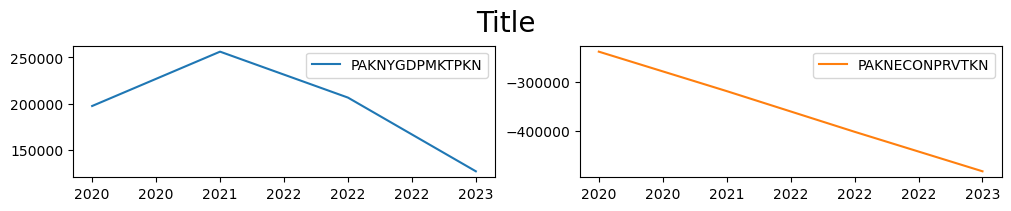

In [41]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].dif.plot()

### .pct  Growthrates 
Display growth rates

$\left(\cfrac{l_t}{l_{t-1}}-1\right )$

In [42]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].pct.plot();

### .difpct property difference in growthrate 
The difference in the growth rates  between the last and base dataframe.  

$\left( \cfrac{l_t}{l_{t-1}}-1 \right) - \left(\cfrac{b_t}{b_{t-1}}-1 \right)$

In [43]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.plot() ; 

### .difpctlevel percent difference of  levels 

$\left( \cfrac{l_t-b_t}{b_{t}} \right) $

In [44]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpctlevel.plot();  

### mul100 multiply by 100 

multiply growth rate by 100. 

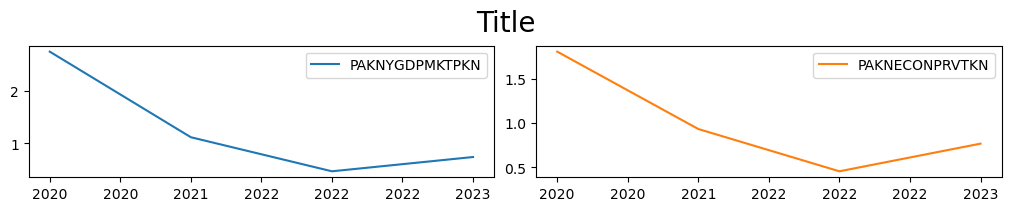

In [45]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].pct.mul100.plot() 

## .plot chart the selected and transformed variables
After the varaibles has been selected and transformed, they can  be plotted. The .plot() method plots the selected variables separately

In [46]:
mpak.smpl(2020,2100);

mpak['PAKNYGDP??????'].rename().plot();

### Options to plot() 

Common:<br>
- title (optional): title. Defaults to ''.
- colrow (TYPE, optional): Columns per row . Defaults to 2.
- sharey (TYPE, optional): Share y axis between plots. Defaults to False.
- top (TYPE, optional): Relative position of the title. Defaults to 0.90.
        
        
More excotic:<br>         
- splitchar (TYPE, optional): If the name should be split . Defaults to '__'.
- savefig (TYPE, optional): Save figure. Defaults to ''.
- xsize  (TYPE, optional): x size default to 10 
- ysize  (TYPE, optional): y size per row, defaults to 2
- ppos (optional): # of position to use if split. Defaults to -1.
- kind (TYPE, optional): Matplotlib kind . Defaults to 'line'.


In [47]:
mpak['PAKNYGDP??????'].difpct.mul100.rename().plot(title='GDP growth ',top = 0.92);

## Plotting inspiration


The following graph shows the components of GDP using the values of the baseline dataframe. 

In [48]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN'].\
difpctlevel.mul100.rename().\
plot(title='Components of GDP in pct of baseline',colrow=1,top=0.90,kind='bar') ;


###  Heatmaps

For some model types heatmaps can be helpful, and they come out of the box. This feature was developed for use by bank stress test models. 

In [49]:
with mpak.set_smpl(2020,2030):
    heatmap = mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].pct.rename().mul100.heat(title='Growth rates',annot=True,dec=1,size=(10,3))  


<a id=’With’></a>
### Violin and boxplots, 
Not obvious for macro models, but useful for stress test  models with many banks. 

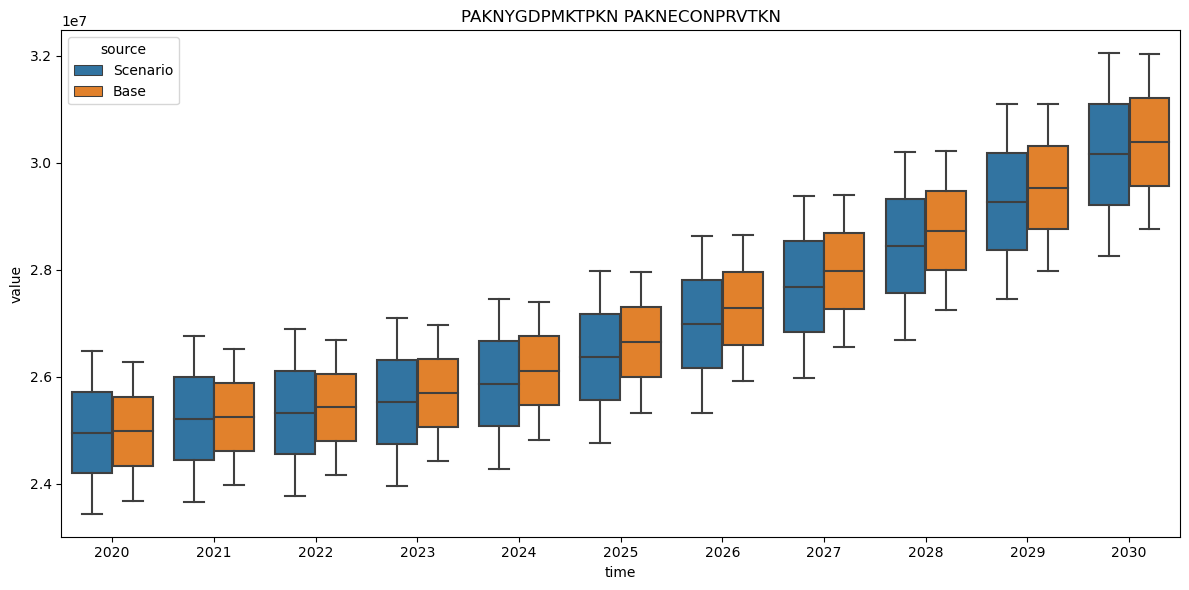

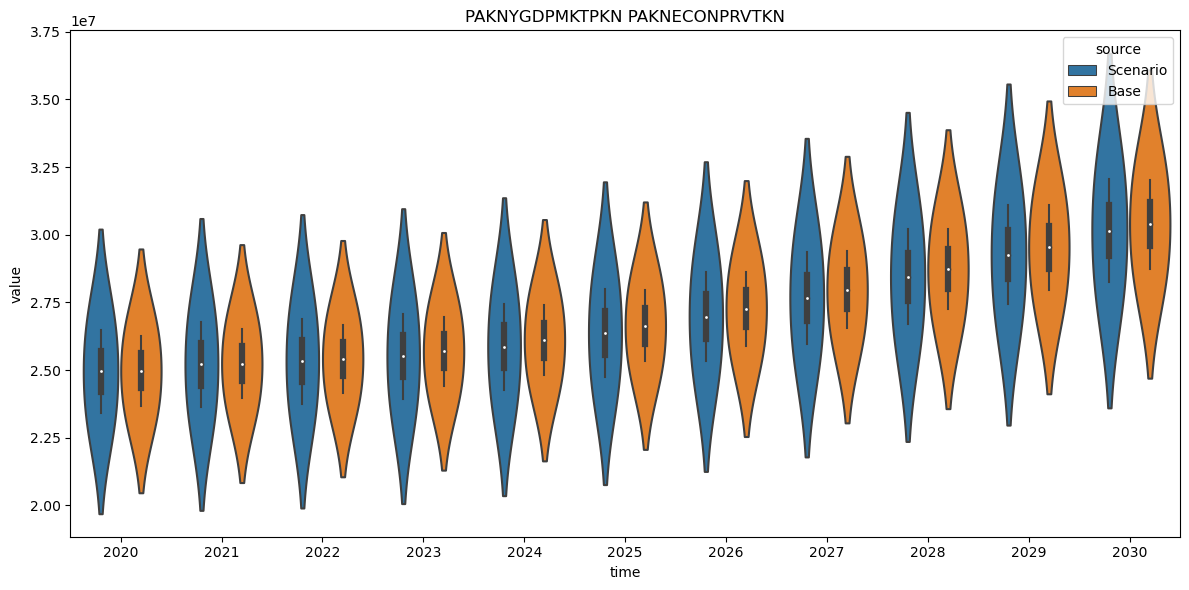

In [50]:
with mpak.set_smpl(2020,2030): 
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.box()  
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.violin()  


### Plot baseline vs alternative
A raw routine, only showing levels.
To make it really useful it should be expanded. 

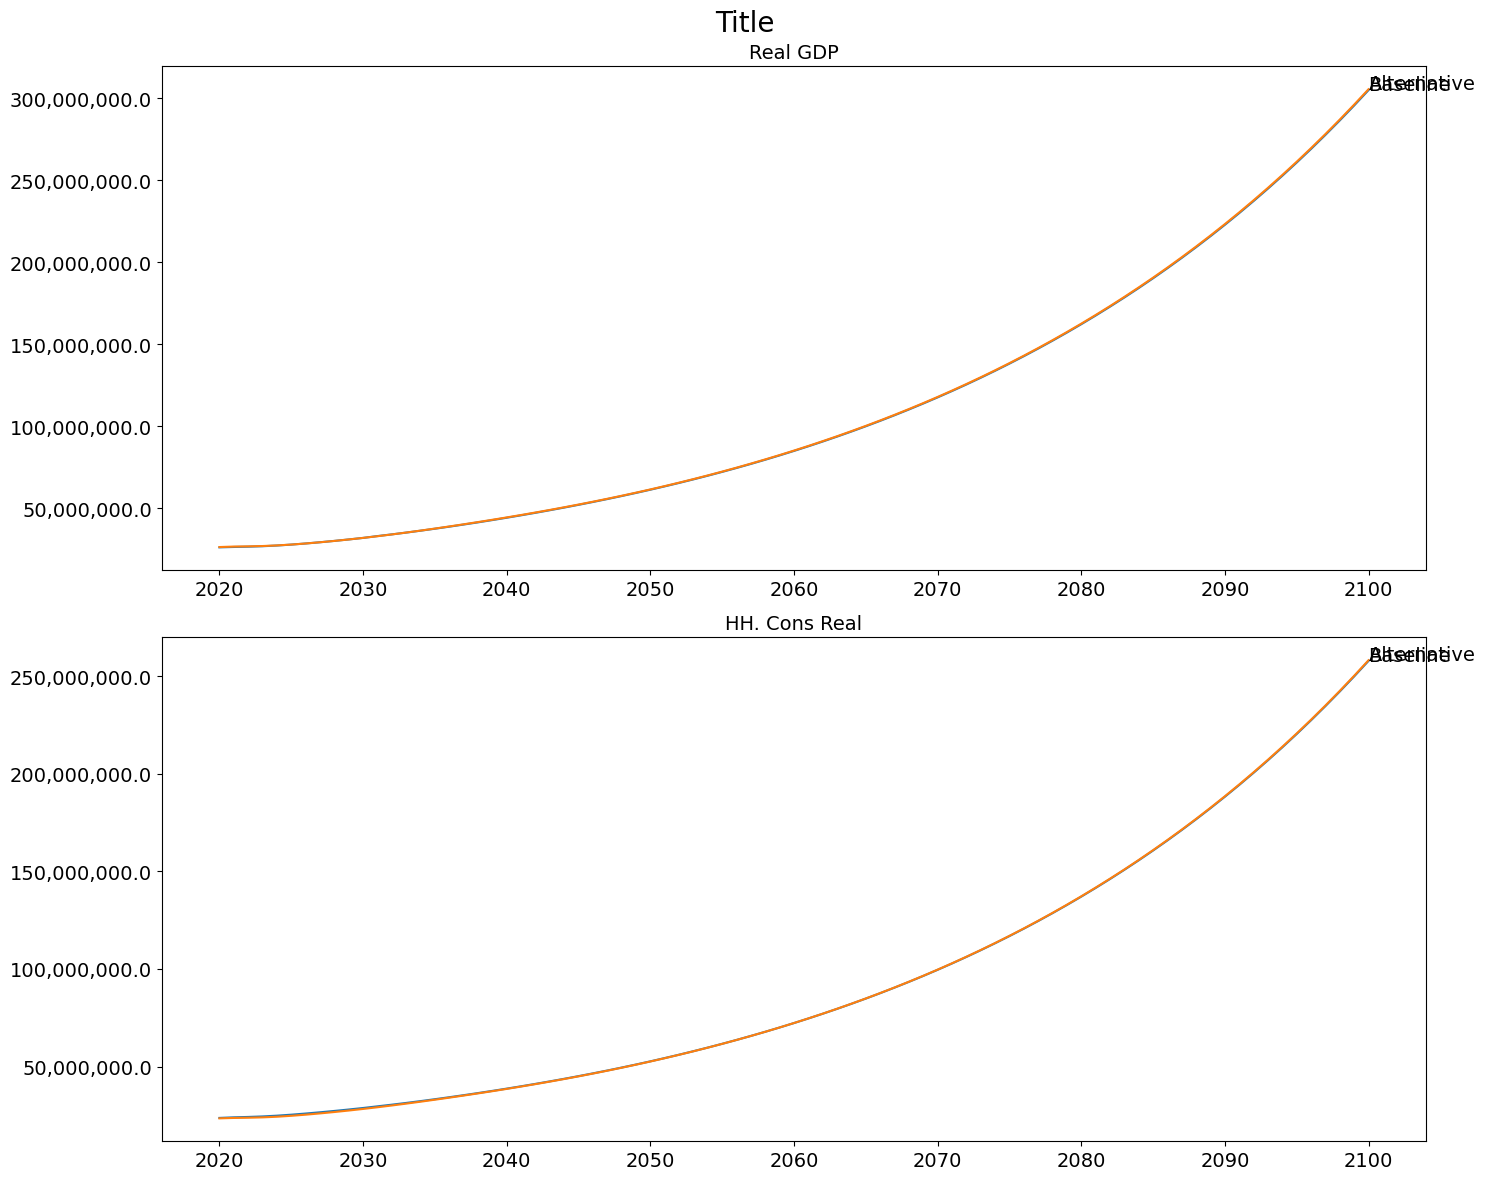

In [51]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].plot_alt() ;


## .draw() Graphical presentation of relationships between variables

.draw() helps you understand the relationship between variables in your model better. 
 
The thickness the arrow reflect the attribution of the the upstream variable to the impact on the downstream variable. 

### .draw(up = level, down = level)


You can specify how many levels up and down you want in your graphical presentation (Needs more explanation).

In this example all variables that depend directly upon GDP and consumption as well as those that are determined by them, are displayed. This means one step upstream in the model logic and one step downstream. 

More on the how to visualize the logic structure [here](../howto/structure/Logical_structure.ipynb) 

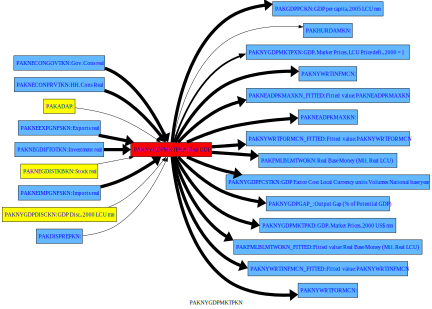

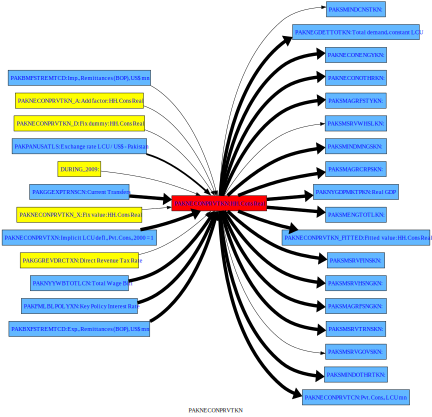

In [52]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].draw(up=1,down=1)  # diagram of all direct dependencies 

### .draw(filter =\<minimal impact>)

By specifying filter=  only links where the minimal impact is more than \<minimal impact> are show. In this case 20% 


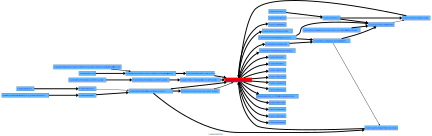

In [53]:
mpak['PAKNECONPRVTKN'].draw(up=3,down=1,filter=20)  



## dekomp() Attrribution of right hand side variables to change in result. 
For more information on attribution look [here](../howto/attribution/Attribution%20background.ipynb)

The dekomp command decomposes the contributions of the right hand side variables to the observed change in the left hand side variables. 

In [54]:
with mpak.set_smpl(2021,2025):
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].dekomp()  # frml attribution 


Formula        : FRML <IDENT> PAKNYGDPMKTPKN = PAKNECONPRVTKN+PAKNECONGOVTKN+PAKNEGDIFTOTKN+PAKNEGDISTKBKN+PAKNEEXPGNFSKN-PAKNEIMPGNFSKN+PAKNYGDPDISCKN+PAKADAP*PAKDISPREPKN $ 

                       2021        2022        2023        2024        2025
Variable    lag                                                            
Base        0   26511370.41 26685141.87 26963077.57 27393200.36 27963231.53
Alternative 0   26767616.83 26891916.75 27090476.06 27455212.23 27979422.14
Difference  0     256246.42   206774.88   127398.49    62011.87    16190.61
Percent     0          0.97        0.77        0.47        0.23        0.06

 Contributions to differende for  PAKNYGDPMKTPKN
                         2021       2022       2023       2024       2025
Variable       lag                                                       
PAKNECONPRVTKN 0   -318856.19 -402491.50 -483707.77 -541702.19 -574030.33
PAKNECONGOVTKN 0    307725.23  272509.92  235813.60  213039.47  200400.95
PAKNEGDIFTOTKN 0    

## Bespoken plots using matplotlib  (or plotly -later) (should go to a separate plot book 

The predefined plots are not necessary created for presentation purpose. To create  bespoken plots the they can be 
constructed directly in python scripts. The two main libraries are matplotlib, plotly but any ther python plotting library can be used. Here is an example using matplotlib. 

## Plot four separate plots of multiple series in grid   

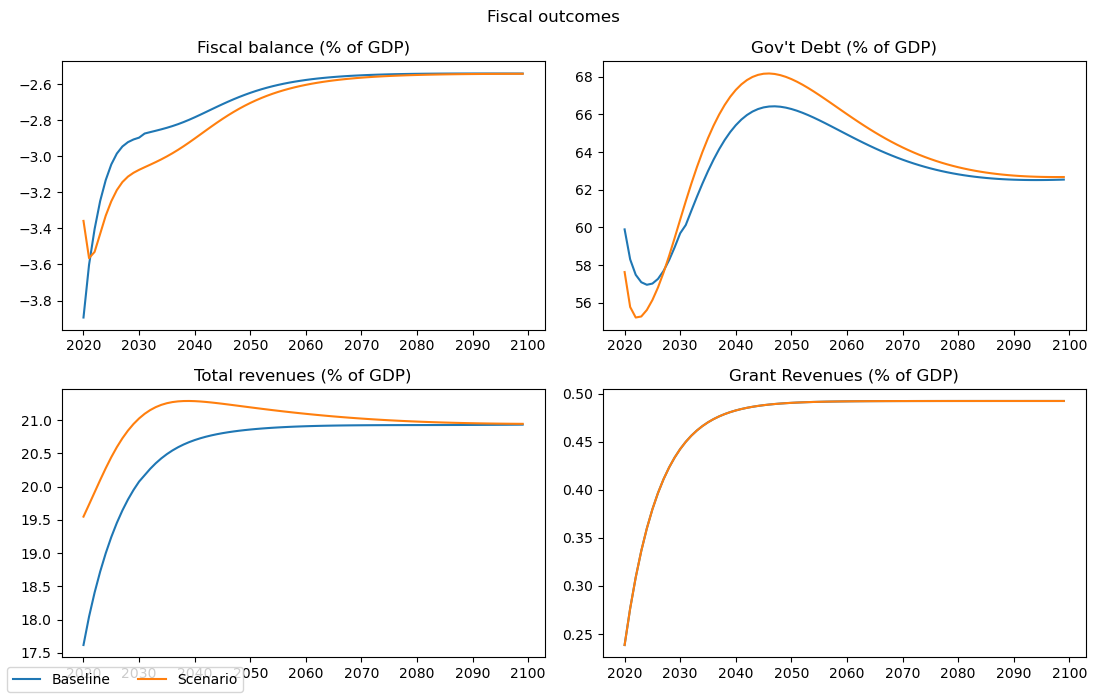

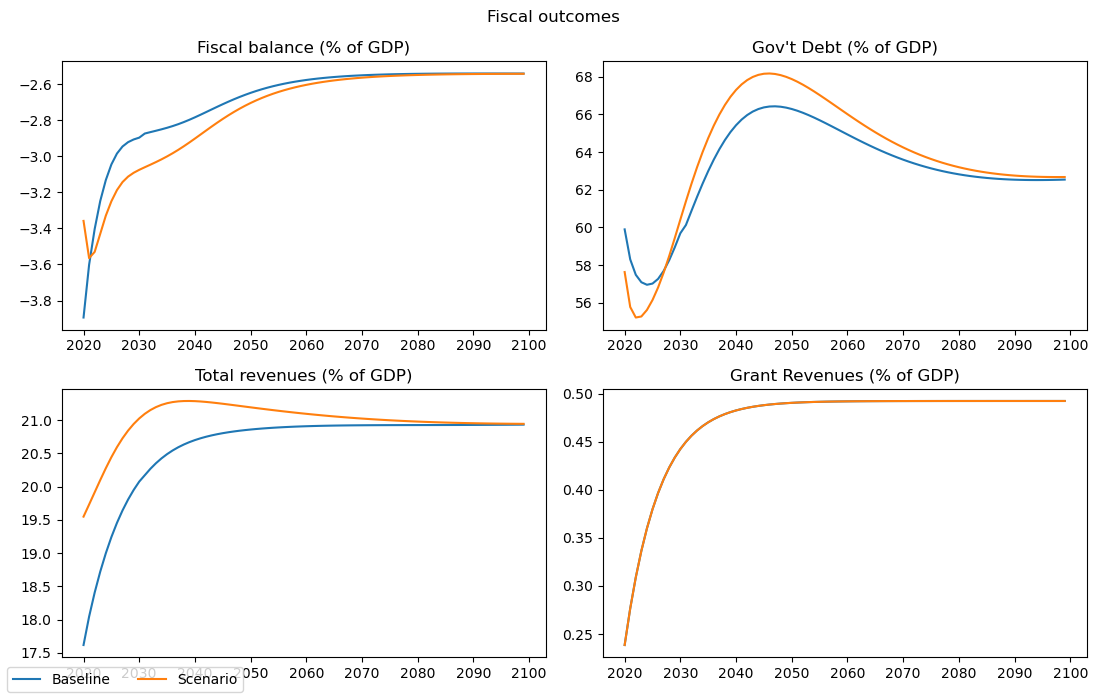

In [55]:
figure,axs= plt.subplots(2,2,figsize=(11, 7))
axs[0,0].plot(mpak.basedf.loc[2020:2099,'PAKGGBALOVRLCN_'],label='Baseline')
axs[0,0].plot(mpak.lastdf.loc[2020:2099,'PAKGGBALOVRLCN_'],label='Scenario')
#axs[0,0].legend()

axs[0,1].plot(mpak.basedf.loc[2020:2099,'PAKGGDBTTOTLCN_'],label='Baseline')
axs[0,1].plot(mpak.lastdf.loc[2020:2099,'PAKGGDBTTOTLCN_'],label='Scenario')

axs[1,0].plot(mpak.basedf.loc[2020:2099,'PAKGGREVTOTLCN']/mpak.basedf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Baseline')
axs[1,0].plot(mpak.lastdf.loc[2020:2099,'PAKGGREVTOTLCN']/mpak.lastdf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')

axs[1,1].plot(mpak.basedf.loc[2020:2099,'PAKGGREVGRNTCN']/mpak.basedf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Baseline')
axs[1,1].plot(mpak.lastdf.loc[2020:2099,'PAKGGREVGRNTCN']/mpak.lastdf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')
#axs2[4].plot(mpak.lastdf.loc[2000:2099,'PAKGGREVGRNTCN']/mpak.basedf.loc[2000:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')

axs[0,0].title.set_text("Fiscal balance (% of GDP)")
axs[0,1].title.set_text("Gov't Debt (% of GDP)")
axs[1,0].title.set_text("Total revenues (% of GDP)")
axs[1,1].title.set_text("Grant Revenues (% of GDP)")
figure.suptitle("Fiscal outcomes")

plt.figlegend(['Baseline','Scenario'],loc='lower left',ncol=5)  
figure.tight_layout(pad=2.3) #Ensures legend does not overlap dates
figure